## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns
import re

## Data Loading

In [2]:
df_ori= pd.read_csv("data/Bengaluru_House_Data.csv")
df_ori.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df_ori.shape

(13320, 9)

## Information about the data set

In [4]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


Why does 'total_sqft' have **object** data type? We need to further investigate this column.

## Data Cleaning

In [5]:
df = df_ori.copy()

### Checking if there are missing values.

In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

### Percentage of missing values for each column.

In [7]:
round(df.isnull().mean() * 100, 2)

area_type        0.00
availability     0.00
location         0.01
size             0.12
society         41.31
total_sqft       0.00
bath             0.55
balcony          4.57
price            0.00
dtype: float64

### Handling Missing Values

There is a large percentage of missing values in the 'society' column. We will just drop it.

In [8]:
df = df.drop(['society'], axis = 1)

There are also large number of missing values in 'balcony'. 
Let's first check the distribution of the number of balconies

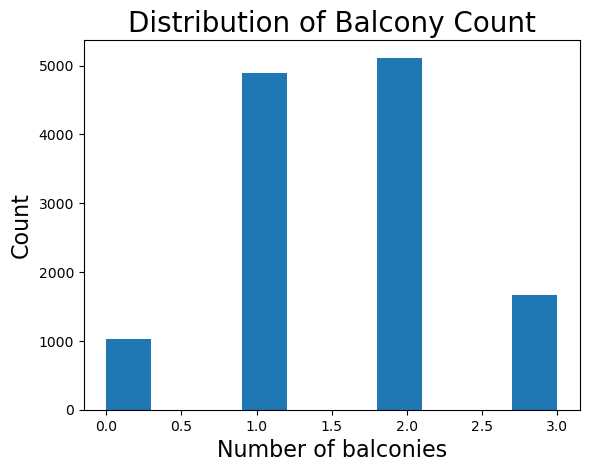

In [9]:
plt.hist(df.balcony)
plt.xlabel('Number of balconies', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title('Distribution of Balcony Count', fontsize = 20)
plt.show()

Since 'balcony' has a roughly symmetric distributions, we will use mean imputation.

In [10]:
balcony_mean = np.round(df['balcony'].mean())
df['balcony'].fillna(balcony_mean, inplace = True)

Let's examine the remaining missing rows.

In [11]:
round(df.isnull().mean() * 100, 2)

area_type       0.00
availability    0.00
location        0.01
size            0.12
total_sqft      0.00
bath            0.55
balcony         0.00
price           0.00
dtype: float64

Since the proportion of missing values for 'location', 'size' and 'bath' is less than 1%, we will just drop these rows.

In [12]:
df.dropna(axis = 0, inplace = True)
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

### Handlung Duplicated Rows

In [13]:
df.duplicated().sum()

569

In [14]:
df.drop_duplicates(inplace = True)

## Feature Engineering

In [15]:
df.nunique()

area_type          4
availability      80
location        1304
size              31
total_sqft      2067
bath              19
balcony            4
price           1955
dtype: int64

### 'total_sqft'

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
special_total_sqft = df[~df['total_sqft'].apply(is_float)]
pd.set_option('display.max_rows', len(special_total_sqft))
special_total_sqft

,area_type,availability,location,size,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000
122,Super built-up Area,18-Mar,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500
549,Super built-up Area,18-Sep,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770
648,Built-up Area,Ready To Move,Arekere,9 Bedroom,4125Perch,9.0,2.0,265.000
661,Super built-up Area,Ready To Move,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130
672,Built-up Area,18-Mar,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000


We can see that some data exists in form of 'range of square feet' and also in other units such as 'square meters', 'square yards', 'ground', 'perch', 'acres', 'cents', 'guntha', we will handle this one by one.

### Replace the range with the average of the min and the max values.

In [18]:
def range_to_average(x):
    y = x.split("-")
    if len(y) == 2:
        return (float(y[0]) + float(y[1])) / 2
    else:
        return x

In [19]:
df['total_sqft'] = df['total_sqft'].apply(range_to_average)
df[~df['total_sqft'].apply(is_float)]

,area_type,availability,location,size,total_sqft,bath,balcony,price
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.50
648,Built-up Area,Ready To Move,Arekere,9 Bedroom,4125Perch,9.0,2.0,265.00
775,Built-up Area,Ready To Move,Basavanagara,1 BHK,1000Sq. Meter,2.0,1.0,93.00
872,Super built-up Area,Ready To Move,Singapura Village,2 BHK,1100Sq. Yards,2.0,2.0,45.00
1019,Plot Area,18-Mar,Marathi Layout,1 Bedroom,5.31Acres,1.0,0.0,110.00
1086,Plot Area,19-Mar,Narasapura,2 Bedroom,30Acres,2.0,2.0,29.50
1400,Super built-up Area,Ready To Move,Chamrajpet,9 BHK,716Sq. Meter,9.0,1.0,296.00
1712,Plot Area,Ready To Move,Singena Agrahara,3 Bedroom,1500Sq. Meter,3.0,1.0,95.00
1743,Super built-up Area,19-Mar,Hosa Road,3 BHK,142.61Sq. Meter,3.0,1.0,115.00
1821,Plot Area,Ready To Move,Sarjapur,3 Bedroom,1574Sq. Yards,3.0,1.0,76.00


### Convert all the other measuring units to square feet.

In [20]:
def convert_to_sqft(sqft_str):
    try:
        # Check if there's a match for the pattern of "<numeric value><unit>" 
        match = re.search(r'(\d+\.?\d*)\s*(\w+\.?\s*\w*)', sqft_str)
        if match:
            # Extract numeric value and unit
            num = float(match.group(1))
            unit = match.group(2)
            
            # Convert to square feet based on the unit
            if unit.lower() == 'sq. meter':
                return num * 10.7639
            elif unit.lower() == 'sq. yards':
                return num * 9
            elif unit.lower() == 'acres':
                return num * 43560
            elif unit.lower() == 'guntha':
                return num * 1089
            elif unit.lower() == 'cents':
                return num * 435.56
            elif unit.lower() == 'grounds':
                return num * 2400 
            elif unit.lower() == 'perch':
                return num * 272.25 
            else:
                # If the unit is not recognized, return NaN
                return sqft_str
        else:
            # If there's no match for the pattern, return NaN
            return sqft_str
    except:
        return sqft_str


In [21]:
df['total_sqft'] = df['total_sqft'].apply(convert_to_sqft)
df[~df['total_sqft'].apply(is_float)]

,area_type,availability,location,size,total_sqft,bath,balcony,price


We have now replaced the range with an average and converted all the other measuring units to square feet.

In [22]:
df['total_sqft'] = df['total_sqft'].astype(float)

### 'size'

In [23]:
df['size'].value_counts()

2 BHK         4902
3 BHK         4084
4 Bedroom      816
4 BHK          560
3 Bedroom      534
1 BHK          514
2 Bedroom      314
5 Bedroom      290
6 Bedroom      191
1 Bedroom      104
8 Bedroom       84
7 Bedroom       82
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

2BHK = 2 Bedroom, 1 Hall, 1 Kitchen. We will create a new feature called 'bedroom'

In [24]:
df['bedroom'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df['bedroom'] = df['bedroom'].astype(float)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12677 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12677 non-null  object 
 1   availability  12677 non-null  object 
 2   location      12677 non-null  object 
 3   size          12677 non-null  object 
 4   total_sqft    12677 non-null  float64
 5   bath          12677 non-null  float64
 6   balcony       12677 non-null  float64
 7   price         12677 non-null  float64
 8   bedroom       12677 non-null  float64
dtypes: float64(5), object(4)
memory usage: 990.4+ KB


### 'availability'

In [26]:
df['availability'].value_counts()

Ready To Move    10122
18-May             286
18-Dec             273
18-Apr             267
18-Aug             187
19-Dec             174
18-Jul             130
18-Mar             124
18-Jun              95
20-Dec              94
19-Mar              84
21-Dec              71
18-Feb              62
18-Nov              45
18-Jan              43
18-Oct              38
19-Jun              34
19-Jul              33
19-Jan              32
18-Sep              32
17-Dec              29
17-Oct              21
19-Sep              20
22-Jun              19
20-Jan              18
19-Aug              18
21-Jun              17
20-Aug              16
19-Apr              16
19-Oct              14
21-Mar              14
17-Jun              13
17-Jul              12
17-Nov              12
21-May              12
17-Sep              11
21-Jan              11
22-Dec              11
20-Jun              10
17-Aug               9
21-Jul               8
19-May               8
17-May               8
22-May     

We'll create a new column called 'ready_to_move' and label 'Ready to move' = 1, else = 0

In [27]:
df['ready_to_move'] = df['availability'].apply(lambda x: 1 if x == 'Ready To Move' else 0)
df['ready_to_move'] = df['ready_to_move'].astype('object')
df['ready_to_move'].value_counts()

1    10122
0     2555
Name: ready_to_move, dtype: int64

### 'location'

We will first remove any leading (spaces at the beginning) and trailing (spaces at the end).

In [28]:
df['location'] = df['location'].apply(lambda x: x.strip())

In [29]:
location_stats = df['location'].value_counts()
location_stats.head(20)

Whitefield                  518
Sarjapur  Road              372
Electronic City             288
Kanakpura Road              235
Thanisandra                 231
Yelahanka                   207
Marathahalli                169
Hebbal                      160
Raja Rajeshwari Nagar       159
Uttarahalli                 154
Bannerghatta Road           149
Hennur Road                 144
7th Phase JP Nagar          133
Electronic City Phase II    126
Rajaji Nagar                106
Haralur Road                 98
Bellandur                    93
KR Puram                     88
Hoodi                        88
Electronics City Phase 1     87
Name: location, dtype: int64

In [30]:
len(location_stats[location_stats <= 10])

1060

We will label any location having **less than 10 data points as 'other'**, this way we can reduce number of categories by huge amount.

In [31]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
df['location'] = df['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
df['location'].nunique()

234

We have reduced the number of categories from 1293 to 234.

## New Feature: 'price_per_sqft', 'total_sqft_per_bedroom'. We will use them to remove outlier.

In [32]:
df['price_per_sqft'] = df['price'] / df['total_sqft']

In [33]:
df['total_sqft_per_bedroom'] = df['total_sqft'] * 0.25 / df['bedroom']

Normally about 25% of a house is devoted for bedrooms.

## Outlier Removal

In [34]:
df_or = df.copy()

C:\Users\garyt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


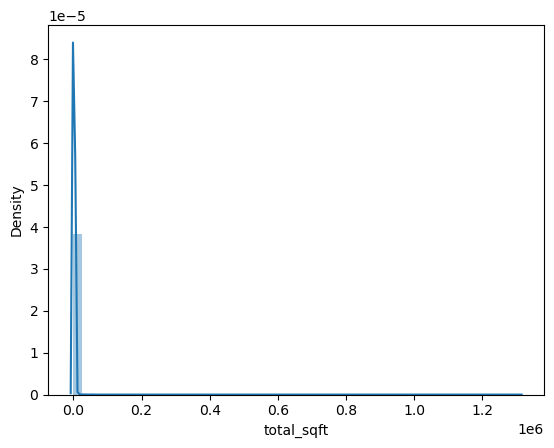

C:\Users\garyt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


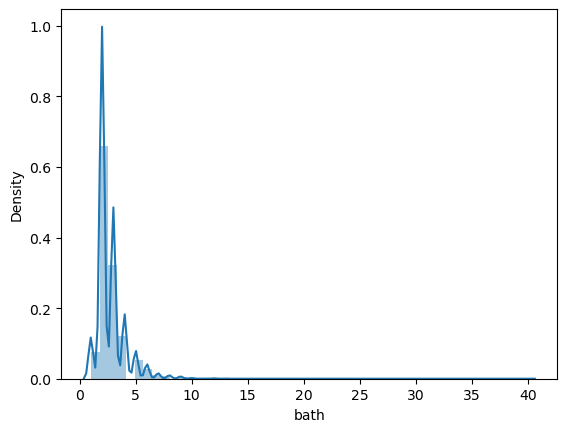

C:\Users\garyt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


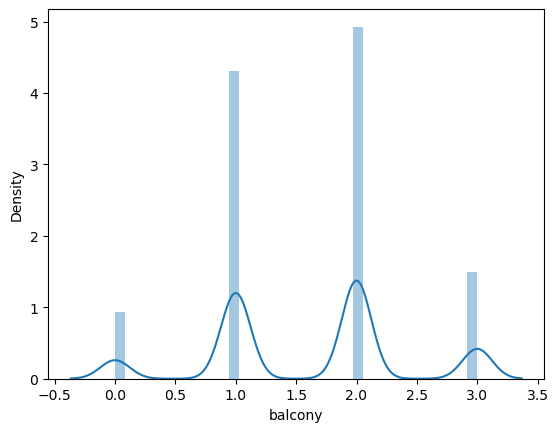

C:\Users\garyt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


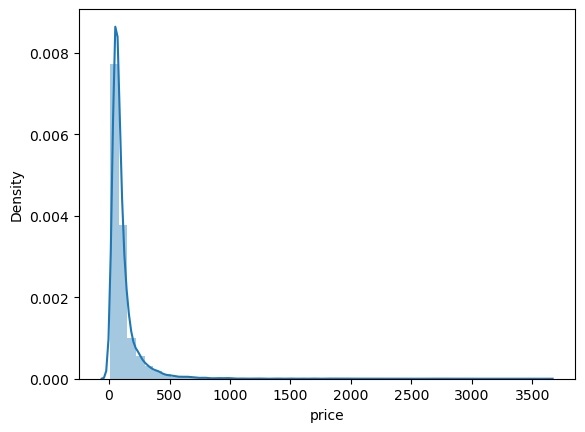

C:\Users\garyt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


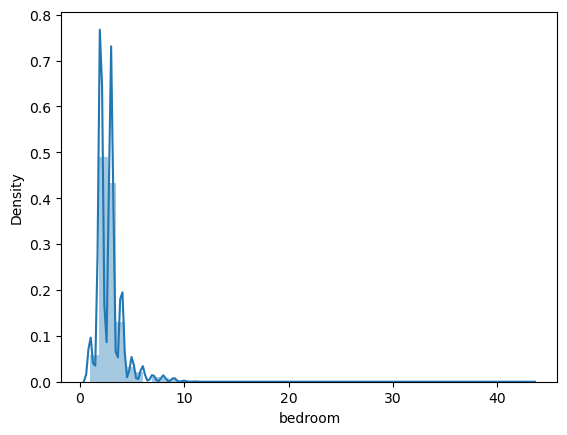

C:\Users\garyt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


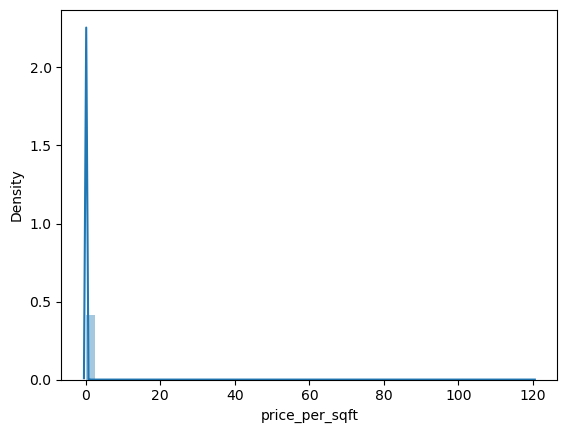

C:\Users\garyt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


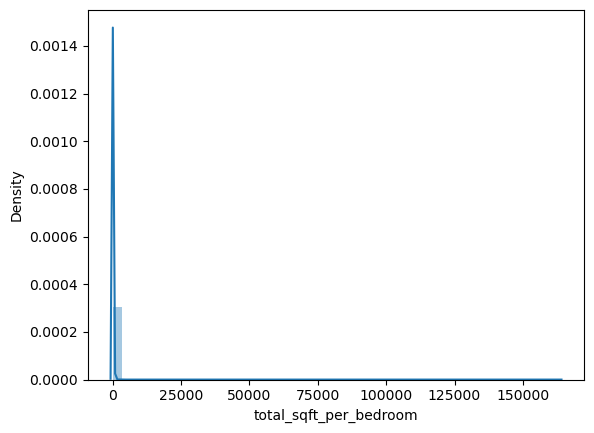

In [35]:
df_or_numerical = df_or.select_dtypes(exclude = ['object'])
for feature in df_or_numerical:
    sns.distplot(df_or[feature])
    plt.show()

Based on the distribution plots, it appears that the majority of the numerical features exhibit skewness, which may be attributed to the presence of outliers within the data.

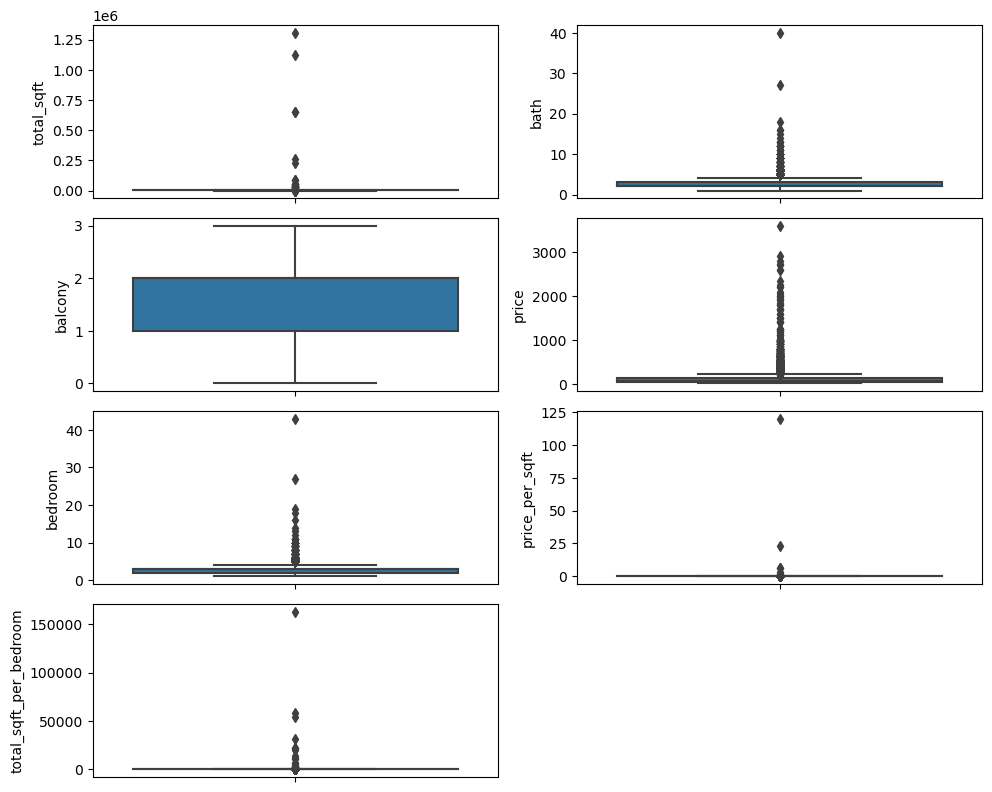

In [36]:
fig = plt.figure(figsize = (10, 8))

for index, col in enumerate(df_or_numerical):
    plt.subplot(4, 2, index + 1)
    sns.boxplot(y = df_or_numerical.loc[:, col])
    
fig.tight_layout(pad = 1.0)

In [37]:
df_or.describe()

,total_sqft,bath,balcony,price,bedroom,price_per_sqft,total_sqft_per_bedroom
count,1.267700e+04,12677.000000,12677.000000,12677.000000,12677.000000,12677.000000,12677.000000
mean,1.936009e+03,2.710420,1.599984,114.320067,2.817622,0.080421,177.205607
std,1.770854e+04,1.359432,0.810282,151.802072,1.314240,1.089074,1680.827643
min,1.000000e+00,1.000000,0.000000,8.000000,1.000000,0.000023,0.062500
25%,1.100000e+03,2.000000,1.000000,50.000000,2.000000,0.042969,118.250000
50%,1.280000e+03,2.000000,2.000000,73.000000,3.000000,0.054878,138.000000
75%,1.691000e+03,3.000000,2.000000,121.000000,3.000000,0.074074,156.625000
max,1.306800e+06,40.000000,3.000000,3600.000000,43.000000,120.000000,163350.000000


It is unusual to have 2 more bathrooms than number of bedrooms in a home. So we are discarding that.

In [38]:
df_or = df_or[~(df_or.bath > df_or.bedroom + 2)]

### Remove 'price_per_sqft'  and 'total_sqft_per_bedroom' outliers.

In [39]:
def remove_outliers_by_group(df, group_col, value_col, threshold=1.5):
    """
    Remove outliers from a Pandas DataFrame based on the IQR method for each group in a specified column.
    
    Parameters
    ----------
    df : pandas DataFrame
        The DataFrame to be cleaned.
    group_col : str
        The name of the column containing the group labels.
    value_col : str
        The name of the column containing the values to be cleaned.
    threshold : float, optional (default=1.5)
        The threshold used to define outliers. Data points outside the range of
        [Q1 - threshold*IQR, Q3 + threshold*IQR] are considered outliers.
        
    Returns
    -------
    pandas DataFrame
        The cleaned DataFrame with outliers removed.
    """
    groups = df.groupby(group_col)
    cleaned_data = pd.DataFrame(columns=df.columns)
    
    for group, group_data in groups:
        q1, q3 = group_data[value_col].quantile([0.25, 0.75])
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        group_data = group_data[(group_data[value_col] >= lower_bound) & (group_data[value_col] <= upper_bound)]
        cleaned_data = pd.concat([cleaned_data, group_data])
        
    return cleaned_data

# Group data by location and remove outliers in 'price_per_sqft' and in 'total_sqft_per_bedroom' column 
## based on IQR for each location.

df_or = remove_outliers_by_group(df_or, 'location', 'price_per_sqft')
df_or = remove_outliers_by_group(df_or, 'location', 'total_sqft_per_bedroom')

### Compare the plots after removing outliers in 'price_per_sqft'

C:\Users\garyt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\garyt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\garyt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

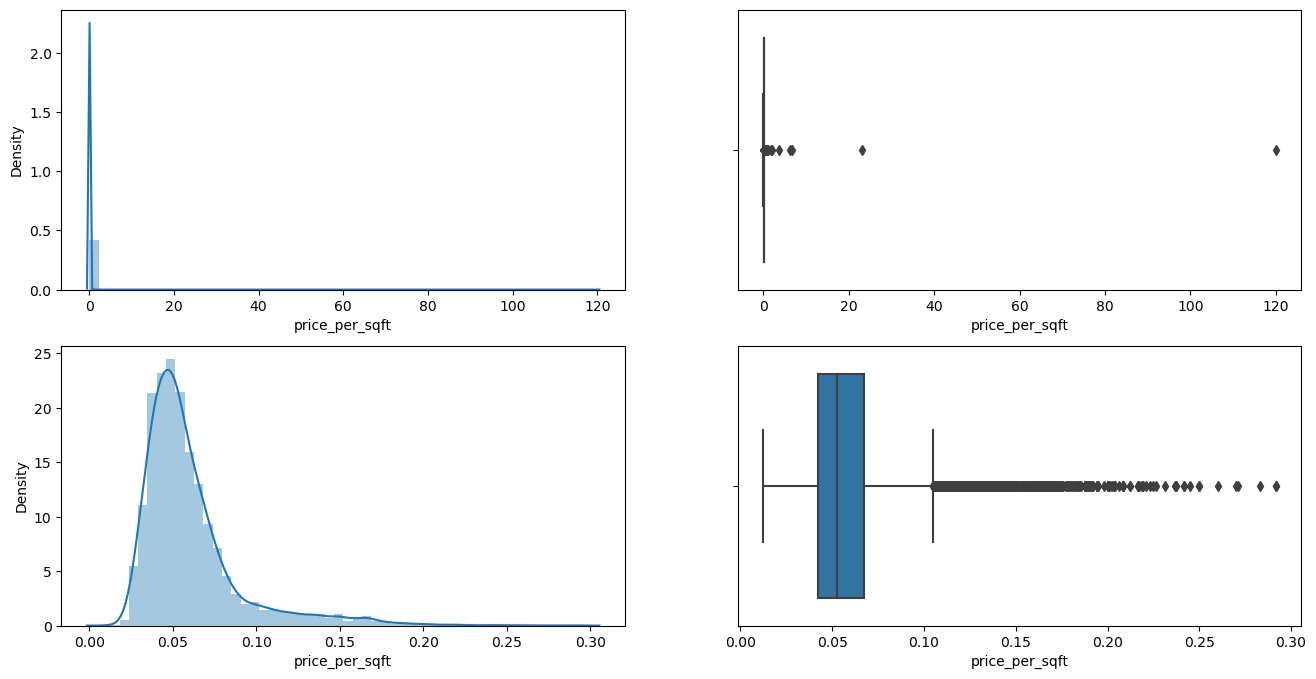

In [40]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['price_per_sqft'])
plt.subplot(2,2,2)
sns.boxplot(df['price_per_sqft'])
plt.subplot(2,2,3)
sns.distplot(df_or['price_per_sqft'])
plt.subplot(2,2,4)
sns.boxplot(df_or['price_per_sqft'])
plt.show()

### Compare the plots after removing outliers in 'total_sqft_per_bedroom'

C:\Users\garyt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\garyt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\garyt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

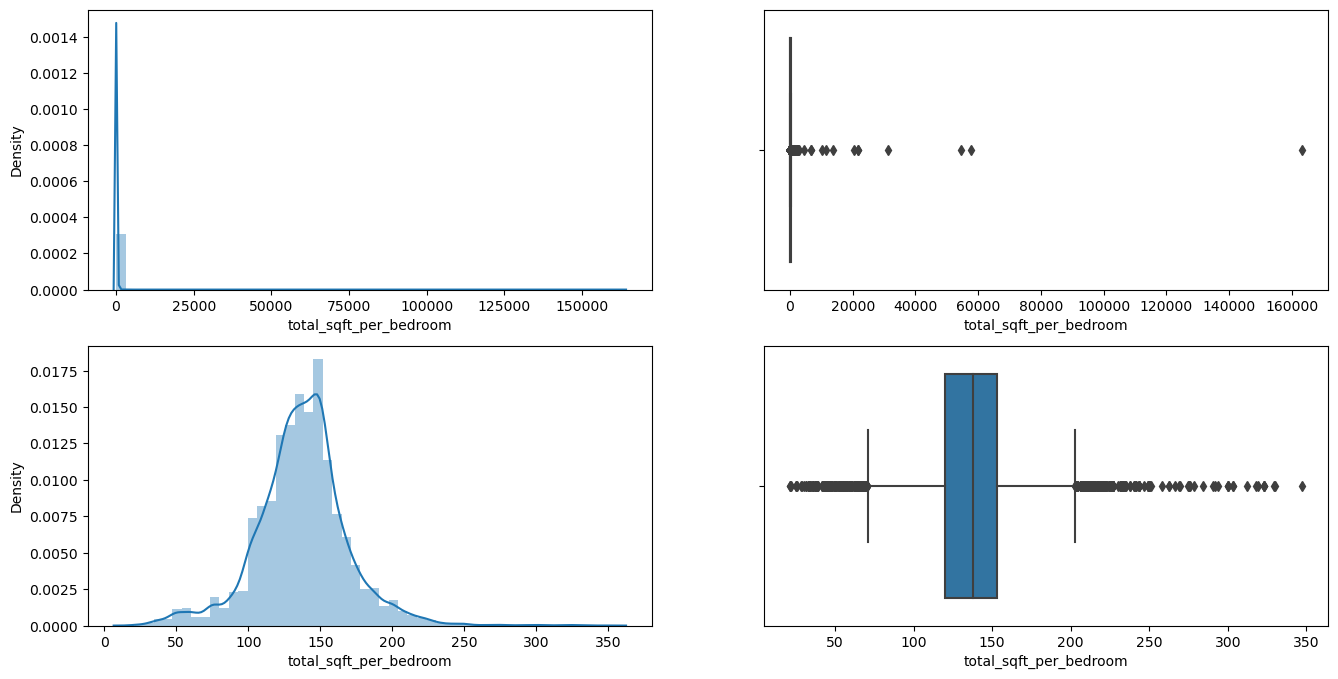

In [41]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['total_sqft_per_bedroom'])
plt.subplot(2,2,2)
sns.boxplot(df['total_sqft_per_bedroom'])
plt.subplot(2,2,3)
sns.distplot(df_or['total_sqft_per_bedroom'])
plt.subplot(2,2,4)
sns.boxplot(df_or['total_sqft_per_bedroom'])
plt.show()

In [42]:
df_or.describe()

,total_sqft,bath,balcony,price,bedroom,price_per_sqft,total_sqft_per_bedroom
count,10934.000000,10934.000000,10934.000000,10934.000000,10934.000000,10934.000000,10934.000000
mean,1420.243513,2.519846,1.592190,89.829737,2.644320,0.060132,137.180288
std,595.264812,1.072135,0.794577,75.349581,1.036151,0.029715,31.552140
min,250.000000,1.000000,0.000000,8.000000,1.000000,0.012500,21.250000
25%,1100.000000,2.000000,1.000000,48.107500,2.000000,0.042009,120.093750
50%,1260.000000,2.000000,2.000000,68.000000,2.000000,0.052381,137.500000
75%,1601.750000,3.000000,2.000000,100.750000,3.000000,0.067179,153.125000
max,10000.000000,27.000000,3.000000,1250.000000,27.000000,0.291667,347.500000


### Remove bedroom outliers.

In [43]:
def remove_bedroom_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bedroom_stats = {}
        for bedroom, bedroom_df in location_df.groupby('bedroom'):
            bedroom_stats[bedroom] = {
                'mean': np.mean(bedroom_df.price_per_sqft),
                'std': np.std(bedroom_df.price_per_sqft),
                'count': bedroom_df.shape[0]
            }
        for bedroom, bedroom_df in location_df.groupby('bedroom'):
            stats = bedroom_stats.get(bedroom - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bedroom_df[bedroom_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')
df_or = remove_bedroom_outliers(df_or)
df_or.shape

(7692, 12)

In [44]:
df_or.shape

(7692, 12)

In [45]:
df_or.describe()

,total_sqft,bath,balcony,price,bedroom,price_per_sqft,total_sqft_per_bedroom
count,7692.000000,7692.000000,7692.000000,7692.000000,7692.000000,7692.000000,7692.000000
mean,1414.245113,2.524181,1.550832,99.710992,2.604004,0.066572,139.269893
std,618.567995,1.129762,0.791248,83.473433,1.096904,0.032389,33.072002
min,250.000000,1.000000,0.000000,8.000000,1.000000,0.013636,21.250000
25%,1080.000000,2.000000,1.000000,50.605000,2.000000,0.046534,123.812500
50%,1250.000000,2.000000,2.000000,75.000000,2.000000,0.058621,140.875000
75%,1645.000000,3.000000,2.000000,120.000000,3.000000,0.073964,156.250000
max,10000.000000,27.000000,3.000000,1250.000000,27.000000,0.291667,347.500000


C:\Users\garyt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\garyt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\garyt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

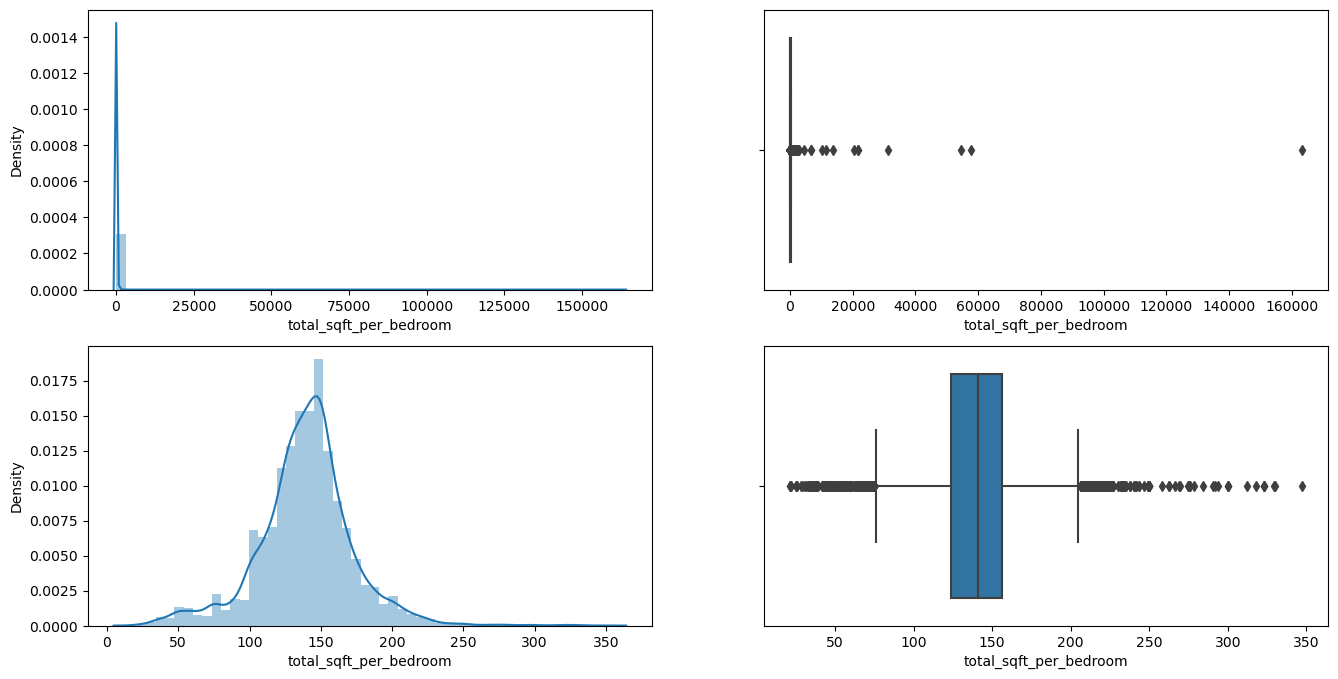

In [46]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['total_sqft_per_bedroom'])
plt.subplot(2,2,2)
sns.boxplot(df['total_sqft_per_bedroom'])
plt.subplot(2,2,3)
sns.distplot(df_or['total_sqft_per_bedroom'])
plt.subplot(2,2,4)
sns.boxplot(df_or['total_sqft_per_bedroom'])
plt.show()

C:\Users\garyt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


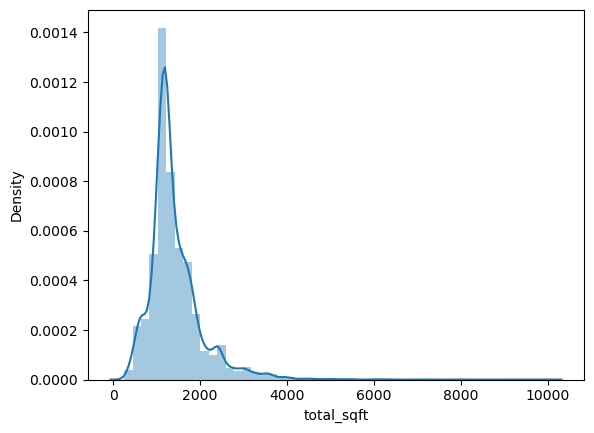

C:\Users\garyt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


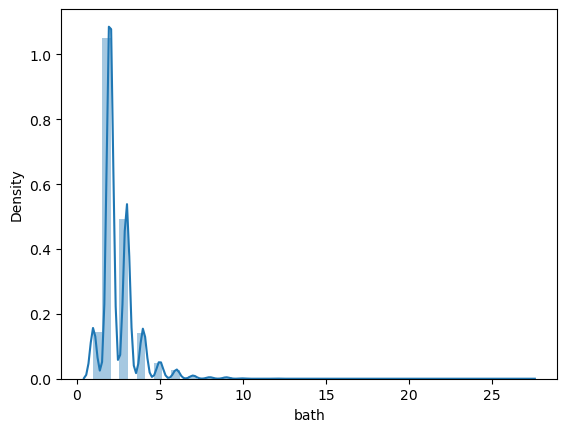

C:\Users\garyt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


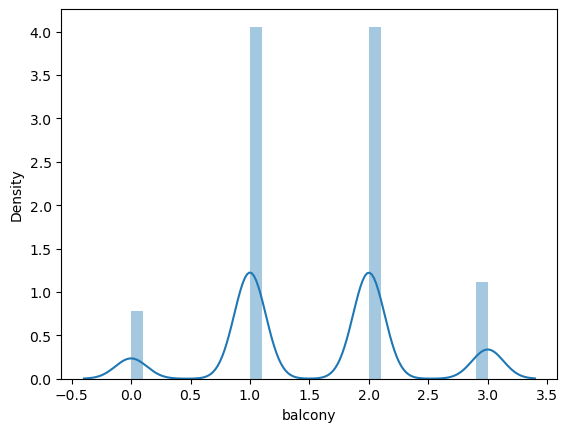

C:\Users\garyt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


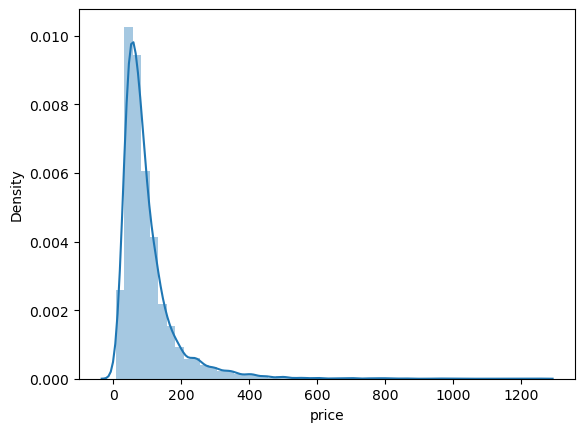

C:\Users\garyt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


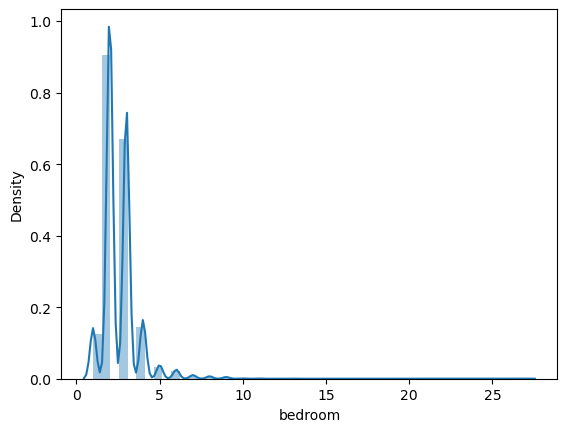

C:\Users\garyt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


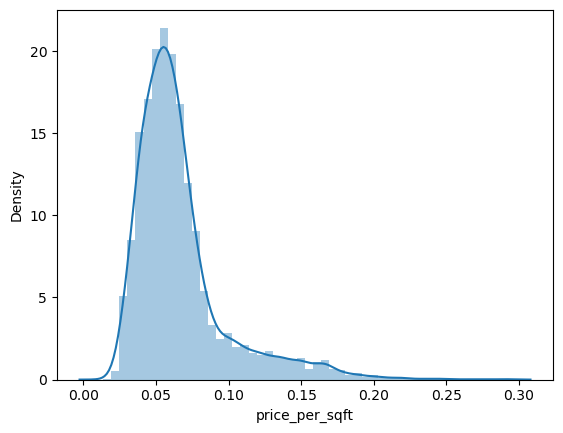

C:\Users\garyt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


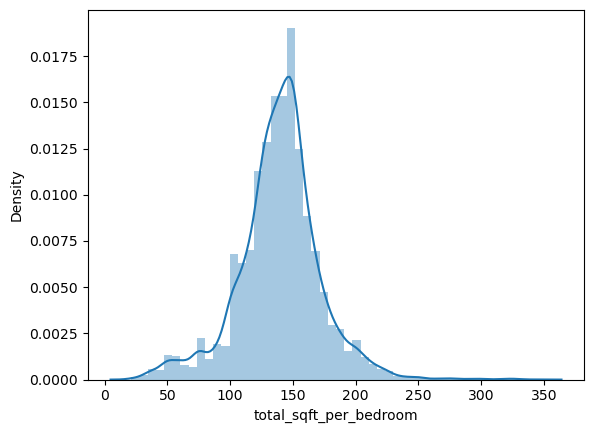

In [47]:
df_or_numerical = df_or.select_dtypes(exclude = ['object'])
for feature in df_or_numerical:
    sns.distplot(df_or[feature])
    plt.show()

### Drop unwanted columns 
- 'availability', because we have 'ready_to_move'
- 'size', because we have 'bedroom'
- 'price_per_sqft', because we only used it to remove outlier

In [48]:
df_out = df_or.drop(['availability', 'size', 'price_per_sqft','total_sqft_per_bedroom'], axis = 1)

In [49]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7692 entries, 210 to 13291
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      7692 non-null   object 
 1   location       7692 non-null   object 
 2   total_sqft     7692 non-null   float64
 3   bath           7692 non-null   float64
 4   balcony        7692 non-null   float64
 5   price          7692 non-null   float64
 6   bedroom        7692 non-null   float64
 7   ready_to_move  7692 non-null   object 
dtypes: float64(5), object(3)
memory usage: 540.8+ KB


In [50]:
df_out.to_csv('data/Bengaluru_House_Data_cleaned.csv', index = False)

In [51]:
pd.read_csv('data/Bengaluru_House_Data_cleaned.csv')

,area_type,location,total_sqft,bath,balcony,price,bedroom,ready_to_move
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4.0,0
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3.0,0
2,Super built-up Area,1st Block Jayanagar,1200.0,6.0,2.0,125.0,6.0,0
3,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3.0,1
4,Plot Area,1st Block Jayanagar,2400.0,4.0,2.0,450.0,4.0,1
...,...,...,...,...,...,...,...,...
7687,Plot Area,other,2000.0,2.0,2.0,360.0,3.0,1
7688,Built-up Area,other,1140.0,1.0,1.0,185.0,2.0,1
7689,Plot Area,other,1400.0,7.0,2.0,218.0,7.0,1
7690,Plot Area,other,1200.0,5.0,2.0,130.0,6.0,1
